# ML Tech Interview

Hello and welcome to the Machine Learning Tech Interview. This interview will be divided in two parts: the theoretical part and the practical/coding part. 

### **I will review only the scripts that will be sent (by pull request on this repo) by 1:00 pm**

Good Luck!!

## Theoretical Part

Please answer the following questions. 

#### What are the assumptions of a linear model (or any other type of model)?

In [0]:
"""
The assumptions of a linear model/other type of model are that there is some kind of relationship between two (or more)
variables.
Linear regression should be mostly used to model simple relationships between variables.
It is better to be applied to small datasets.
It does not work very well when the form of the relationships in the data is unknown, or is not of the specified format.
"""

#### What’s the difference between K Nearest Neighbor and K-means Clustering?

In [0]:
"""
The difference between K Nearest Neighbor and K-means Clustering is that K Nearest Neighbor is used for supervised learning
while K-Means clustering is used for unsupervised learning.

- K Nearest Neighbor
Used in Supervised learning. It can be used for both classification and regression.

- K-means clustering 
Used for unsupervised learning. It is used for clustering.
"""


#### How do you address overfitting?

In [0]:
""""
Overfitting can be adressed by: 
- Regularization: this is a way to avoid overfitting by removing high-valued regression coefficients. 
It reduces the parameters and simplifies the model.

- Shrinkage: Shrinkage is where extreme values in a sample are “shrunk” towards a central value, like the sample mean.

- Dimension reduction (with PCA for example): this means that the number of features of the dataset is reduced.
This will produce a model with less noise.
"""


#### Explain Naive Bayes algorithms.

In [0]:
"""
The Naive Bayes algorithm is a machine learning classification technique based on Bayes’ Theory 
that assumes that two predictors (variables) are independent.
It assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.
The model is based on the following assumption:

P(A|B) = (P(B|A) * P(A))/ P(B)

The model is useful for very large data sets. 

Process of the model:
Step 1: Convert the data set into a frequency table (contingency table)
Step 2: Create Likelihood table by finding the probabilities
Step 3: The Naive Bayesian equation should be used to calculate the probability for each class. 
Step 4: The class with the highest probability is the outcome of prediction.
"""

#### When do you use an AUC-ROC score? What kind of information can you gather from it?

In [0]:
"""
The AUC-ROC, stands for "Area Under the Curve - Receiver Operating Characteristics". 
AUC ROC is an important metric for a classification model’s performance.
the AUC-ROC curve plots the True Positive Rate (Recall or Sensitivity) against the False Positive Rate. 
The AUC-ROC score shows how good a classification model can distinguish the true positive and the true negative values. 
The higher the score, the better the model is in distinguishing the true values.
"""

#### What is cross validation?

In [0]:
"""
Cross-validation is used to estimate the skill of a machine learning model on unseen data. 
It uses a limited sample in order to estimate how the model is expected to perform in general 
when used to make predictions on data not used during the training of the model.
In the basic approach, called k-fold CV, the training set is split into k smaller sets.
A test set should then be held for the final evaluation, but the validation set is no longer needed.
"""

#### What are confounding variables?

In [0]:
"""
a confounding variable is a variable that influences both the dependent variable and independent variable.
This can be seen in a correlation matrix or a heatmap. 
This variable will have a high correlation with both the target (dependent variable) and some of the other variables.
"""

#### If an important metric for our company stopped appearing in our data source, how would you investigate the causes?

In [0]:
"""
Since the metric was present first, and then stopped appearing, we can check which variables predict the metric most
by doing a supervised learning model.
After identifying the variables that predict the metric most, the data from when the metric was still appearing can be compared with the data from when the metric stopped appearing.
Especially it should be investigated how the variables that predict the metric most have changed over time.
This can help to get insights in why the metric stopped appearing.
"""

## Practical Machine Learning

In this challenge, you will showcase your knowledge in feature engineering, dimensionality reduction, model selection and evaluation, hyperparameter tuning, and any other techniques of machine learning.

There isn't a correct solution to this challenge. All we would like to learn is your thinking process that demonstrates your knowledge, experience, and creativity in developing machine learning models. Therefore, in addition to developing the model and optimizing its performance, you should also elaborate your thinking process and justify your decisions thoughout the iterative problem-solving process.

The suggested time to spend on this challenge is 90-120 minutes. If you don't have time to finish all the tasks you plan to do, simply document the to-dos at the end of your response.

#### Instructions:

- Download the housing prices data set (housing_prices.csv). The data is big enough to showcase your thoughts but not so that processing power will be a problem.
- Using Python, analyze the features and determine which feature set to select for modeling.
- Train and cross validate several regression models, attempting to accurately predict the SalePrice target variable.
- Evaluate all models and show comparison of performance metrics.
- State your thoughts on model performance, which model(s) you would select, and why.

#### Deliverables Checklist:

- Python code.
- Your thinking process.
- The features selected for machine learning.
- The results (e.g., performance metrics) of your selected model(s).

In [ ]:
#### Importing libraries

In [41]:
import matplotlib
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import table
import scipy
from scipy.stats import chisquare
from matplotlib.ticker import PercentFormatter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Problem

In [ ]:
"""
We would like to know which features are best to predict the Sale price of a house.
"""

#### Exploring the dataset

In [2]:
# Downloading the housing set
housing = pd.read_csv('housing_prices.csv')
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [14]:
# Looking at the dataset
housing.shape

(1460, 81)

In [15]:
# Get the types of the data
pd.set_option("display.max_rows", 200)
dtypes= housing.dtypes
dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [11]:
# Checking for missing values
pd.set_option("display.max_rows", 200)
housing_na = housing.isna().sum()
housing_na

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [17]:
# Checking columns
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [19]:
# Checking unique values
for col in housing.columns:
    print(housing[col].unique())

[   1    2    3 ... 1458 1459 1460]
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
['RL' 'RM' 'C (all)' 'FV' 'RH']
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
[ 8450  9600 11250 ... 17217 13175  9717]
['Pave' 'Grvl']
[nan 'Grvl' 'Pave']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub' 'NoSeWa']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Gtl' 'Mod' 'Sev']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sa

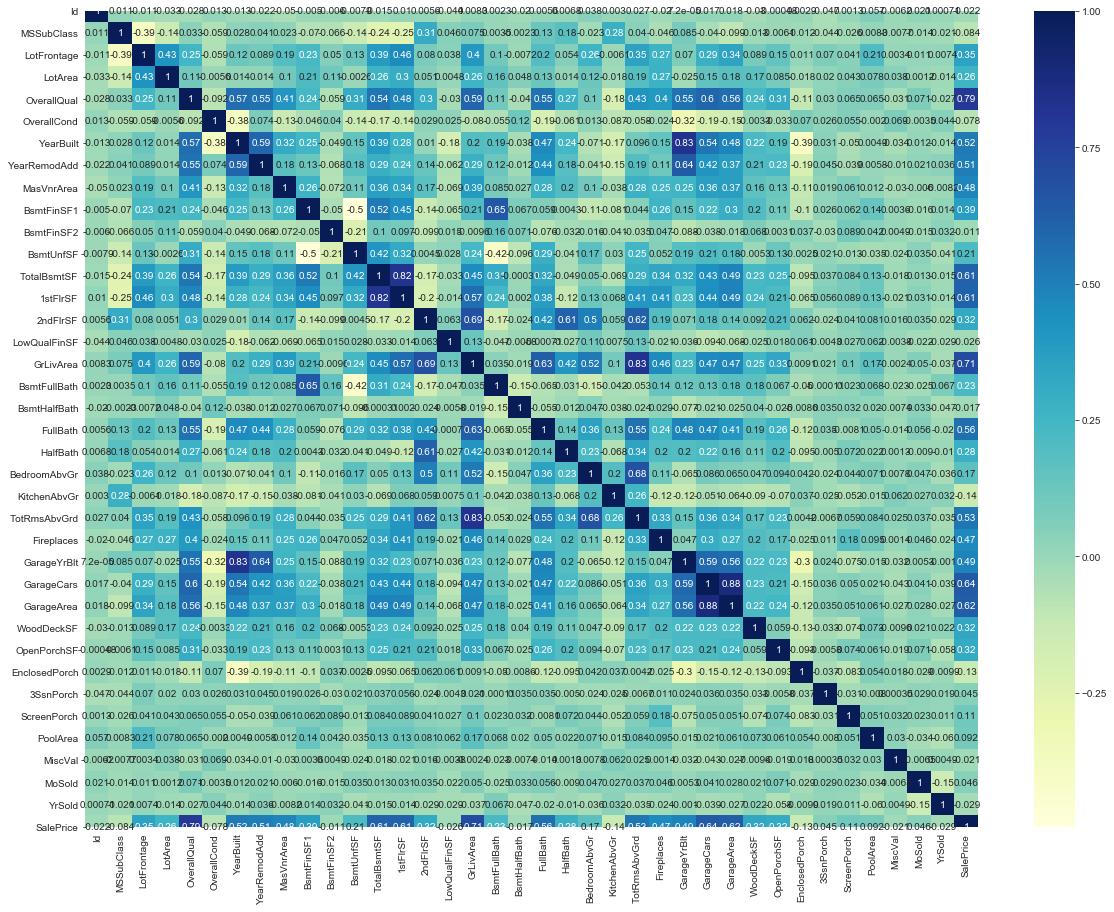

In [10]:
# Checking correlations
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(20,15))
ax= sns.heatmap(housing.corr(), annot= True, cmap = 'YlGnBu')

#### Reducing the features of the dataset

In [ ]:
"""
In order to clean the dataset and also to reduce the amount of features, some columns will be dropped.
Some columns will be dropped, based on:
1. Too many missing values
2. Having a correlation that is too high, which will not be good for the prediction model
3. not giving any additional or clear information.

In [ ]:
"""
1. Columns that have more than 60% of NaN values:
- FireplaceQu
- MiscFeature
- Fence 
- PoolQC
- Alley

2. Columns that have a correlation of over 70% will be dropped:
- OverallQual
- GrLivArea
- MiscVal

3. Columns that don´t give extra information or information that is not clear, will be removed:
Condition1        
Condition2        
Utilities         
Exterior1st       
Exterior2nd       
BsmtExposure      
BsmtFinType1      
BsmtFinSF1         
BsmtFinType2      
BsmtFinSF2         
BsmtUnfSF          
1stFlrSF           
2ndFlrSF           
LowQualFinSF       
BsmtHalfBath       
GarageQual        
HalfBath
SaleType
SaleCondition

"""

In [30]:
housing_new = housing.drop(['FireplaceQu','MiscFeature','Fence','PoolQC','Alley','OverallQual','GrLivArea','MiscVal', 'Condition1','Condition2', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1','BsmtFinType2','BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtHalfBath', 'GarageQual', 'HalfBath', 'SaleType','SaleCondition', 'LandSlope'], axis = 1)
housing_new

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,Neighborhood,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,CollgCr,...,Y,0,61,0,0,0,0,2,2008,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Veenker,...,Y,298,0,0,0,0,0,5,2007,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,CollgCr,...,Y,0,42,0,0,0,0,9,2008,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Crawfor,...,Y,0,35,272,0,0,0,2,2006,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,NoRidge,...,Y,192,84,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,Inside,Gilbert,...,Y,0,40,0,0,0,0,8,2007,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,Inside,NWAmes,...,Y,349,0,0,0,0,0,2,2010,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,Inside,Crawfor,...,Y,0,60,0,0,0,0,5,2010,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,Inside,NAmes,...,Y,366,0,112,0,0,0,4,2010,142125


#### Changing the categorical data to numerical

In [ ]:
"""
After dropping the columns with the missing values, in order to continue with the dataset, 
the categorical needs to be converted to numerical.

In [32]:
# The categorical data that it still present in the dataset is the following:
housing_df = housing_new.dtypes.to_frame()
housing_df

filt_1= housing_df[0]== "object"
housing_object = housing_df[filt_1]
housing_object

,0
MSZoning,object
Street,object
LotShape,object
LandContour,object
LotConfig,object
Neighborhood,object
BldgType,object
HouseStyle,object
RoofStyle,object
RoofMatl,object


In [ ]:
"""
To understand better how the categorical data needs to be converted to numerical, 
we should look at the different items separately.
Since there are so many categorical items, some items need to be dropped. Others will need to be reconverted.
"""

In [33]:
# This column can be converted to numerical:
housing_new["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [34]:
# There are too many values for this item to convert, so this column will be dropped:
housing_new["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [36]:
# This column can be converted to numerical:
housing_new["HouseStyle"].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [37]:
# This column can be converted to numerical:
housing_new["Foundation"].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [38]:
# Since most of the items are in GasA, this columns won´t give much information and therefore will be dropped
housing_new["Heating"].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [39]:
# Since most of the items are in SBrkr, this columns won´t give much information and therefore will be dropped
housing_new["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [40]:
# Since most of the items are in Typ, this columns won´t give much information and therefore will be dropped
housing_new["Functional"].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [45]:
# This column can be converted to numerical:
housing_new["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [ ]:
"""
After investigating several items, the object columns that will be kept (and have to be converted) are:
MSZoning          
HouseStyle        
GarageType
Foundation

The other columns will be dropped.
"""

In [46]:
housing_final = housing_new.drop(['Street', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood','BldgType','RoofStyle','RoofMatl','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive'], axis = 1)
housing_final

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,HouseStyle,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
0,1,60,RL,65.0,8450,2Story,5,2003,2003,196.0,...,548,0,61,0,0,0,0,2,2008,208500
1,2,20,RL,80.0,9600,1Story,8,1976,1976,0.0,...,460,298,0,0,0,0,0,5,2007,181500
2,3,60,RL,68.0,11250,2Story,5,2001,2002,162.0,...,608,0,42,0,0,0,0,9,2008,223500
3,4,70,RL,60.0,9550,2Story,5,1915,1970,0.0,...,642,0,35,272,0,0,0,2,2006,140000
4,5,60,RL,84.0,14260,2Story,5,2000,2000,350.0,...,836,192,84,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,2Story,5,1999,2000,0.0,...,460,0,40,0,0,0,0,8,2007,175000
1456,1457,20,RL,85.0,13175,1Story,6,1978,1988,119.0,...,500,349,0,0,0,0,0,2,2010,210000
1457,1458,70,RL,66.0,9042,2Story,9,1941,2006,0.0,...,252,0,60,0,0,0,0,5,2010,266500
1458,1459,20,RL,68.0,9717,1Story,6,1950,1996,0.0,...,240,366,0,112,0,0,0,4,2010,142125


##### Converting the items chosen to keep to numerical

In [52]:
housing_final['MSZoning']= housing_final['MSZoning'].replace({'RL':1, 'RM':2, 'FV':3, 'RH': 4, 'C (all)': 5 })
housing_final

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,HouseStyle,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
0,1,60,1,65.0,8450,2Story,5,2003,2003,196.0,...,548,0,61,0,0,0,0,2,2008,208500
1,2,20,1,80.0,9600,1Story,8,1976,1976,0.0,...,460,298,0,0,0,0,0,5,2007,181500
2,3,60,1,68.0,11250,2Story,5,2001,2002,162.0,...,608,0,42,0,0,0,0,9,2008,223500
3,4,70,1,60.0,9550,2Story,5,1915,1970,0.0,...,642,0,35,272,0,0,0,2,2006,140000
4,5,60,1,84.0,14260,2Story,5,2000,2000,350.0,...,836,192,84,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,1,62.0,7917,2Story,5,1999,2000,0.0,...,460,0,40,0,0,0,0,8,2007,175000
1456,1457,20,1,85.0,13175,1Story,6,1978,1988,119.0,...,500,349,0,0,0,0,0,2,2010,210000
1457,1458,70,1,66.0,9042,2Story,9,1941,2006,0.0,...,252,0,60,0,0,0,0,5,2010,266500
1458,1459,20,1,68.0,9717,1Story,6,1950,1996,0.0,...,240,366,0,112,0,0,0,4,2010,142125


In [ ]:
housing_final['HouseStyle']= housing_final['HouseStyle'].replace({'1Story':1, '2Story':2, '1.5Fin':3, 'SLvl': 4, 'SFoyer': 5, '1.5Unf': 6, '2.5Unf': 7,'2.5Fin': 8 })
housing_final

In [ ]:
housing_final['GarageType']= housing_final['GarageType'].replace({'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'Basment': 4, 'Carport': 5, '2Types': 6 })

In [ ]:
housing_final['Foundation']= housing_final['Foundation'].replace({'PConc':1, 'CBlock':2, 'BrkTil':3, 'Slab': 4, 'Stone': 5, 'Wood': 6 })
housing_final

#### Features chosen for the prediction

In [47]:
# The features that have been chosen for the prediction are:
housing_final.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'HouseStyle',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

#### Modeling and Prediction

In [ ]:
"""
Now that the dataset has been cleaned, the modeling and prediction can start.
This is a typical case of Supervised learning, since we want to predict a variable that we already know: the SalePrice.

The steps will be the following:
1. Separating the data into a dependent and independent variables.
2. Scaling the independent variables.
3. Dividing the dataset into a train and a testset.

Then for every model, the steps to take are:
4. Fitting the model
5. Predicting
6. Evaluating the model based on the Confusion Matrix and the Accuracy Score.

"""

In [ ]:
# Separating into a dependent and independent variables:
y = ['SalePrice']
X = housing_new.drop(['SalePrice'], axis = 1)

# Scaling the independent variables:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Dividing the dataset into a train and a testset.
# The percentage for the testset will be set to 20%:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

#### 1. Linear Regression Model

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train) 
y_pred= lr.predict

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

confusion_matrix(y_test, y_pred)
acc = lr.score(X_test,y_test)*100 

#### 2. K Nearest Neighbors Model

##### 2.1 With K= 3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
# Confusion Matrix and Accuracy Score

cm_1= confusion_matrix(y_test, y_pred)
acc = knn.score(X_test, y_test)*100
print(cm_1)
print(f"3 neighbors KNN Score: {round(acc,2)}%")

##### 2.2 With K= 5

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)  # n_neighbors means k
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
# Confusion Matrix and Accuracy Score
cm= confusion_matrix(y_test, y_pred)
acc = knn.score(X_test, y_test)*100
print(cm)
print(f"5 neighbors KNN Score: {round(acc,2)}%")

#### 3. With Decistion Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor(random_state = 29)
model = regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [ ]:
# Accuracy Score:
acc_dt = regr.score(X_test, y_test)

#### Evaluation of the models

In [ ]:
"""
In regression problems, the accuracy of an algorithm is measured,
based on how far away the values that the algorithm predicts are from the true values.

Two metrics (amongst others) that can be used, are:
1. mean absolute error
2. R-squared (mostly used for basic linear regression problems)

#### 1. Mean Absolute Error

In [ ]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(y_test, y_pred)

#### 2. R-Squared

##### R-Squared linear regression

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

#### Conclusion

In [ ]:
"""
After having concluded several supervised learning tests, 
the model that is predicting the Sales Price of the housing best is:


"""